# Jakiel David
# Task 3 

# 10.16 Intro to Data Science: Time Series ad Simple Linear Regression 

## Linear Relationships

In [71]:
c = lambda f: 5/9 * (f-32)

In [72]:
temps = [(f,c(f)) for f in range(0,101,10)]

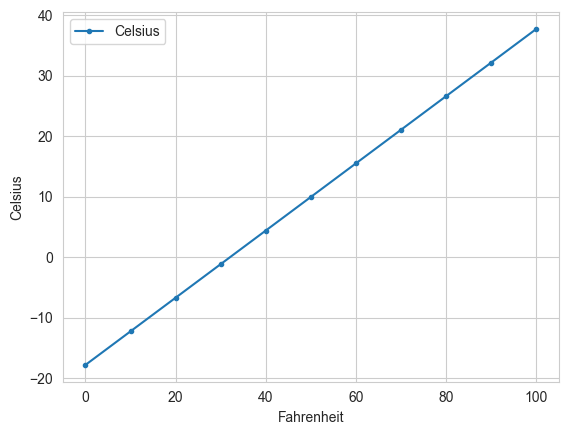

In [73]:
import pandas as pd

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-') 

y_label = axes.set_ylabel('Celsius')

# Loading the NYC Average High Temperature into DF

In [74]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [75]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [76]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


# Cleaning the data 

In [77]:
nyc.columns = ['Date', 'Temperature', 'Anomaly'] #rename column

In [78]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [79]:
nyc.Date.dtype

dtype('int64')

In [80]:
nyc.Date = nyc.Date.floordiv(100) #truncate last 2 digits

In [81]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


# Calculating Basic Descriptive Stats 

In [82]:
pd.set_option('display.precision', 2) # book example used 'precision', wont work for me

nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

# Forecasting Future January Average High Temps

In [83]:
from scipy import stats

In [84]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [85]:
linear_regression.slope

0.014771361132966163

In [86]:
linear_regression.intercept

8.694993233674289

In [87]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

# Predicting Average January Average High Temp in 2026

In [88]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

# Plotting average high temperature and a regression line

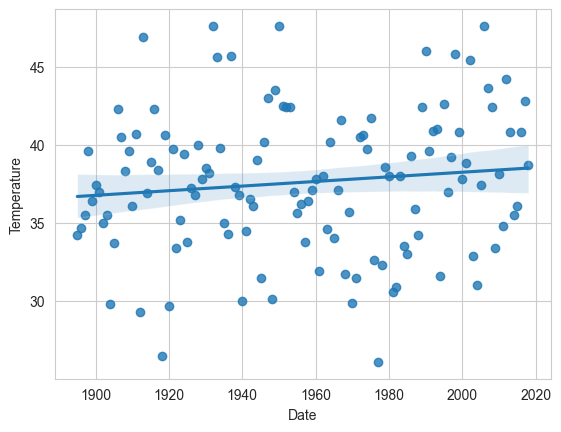

In [89]:
import seaborn as sns

sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date,y=nyc.Temperature)


In [90]:
axes.set_ylim(10, 70)

(10.0, 70.0)

(10.0, 70.0)

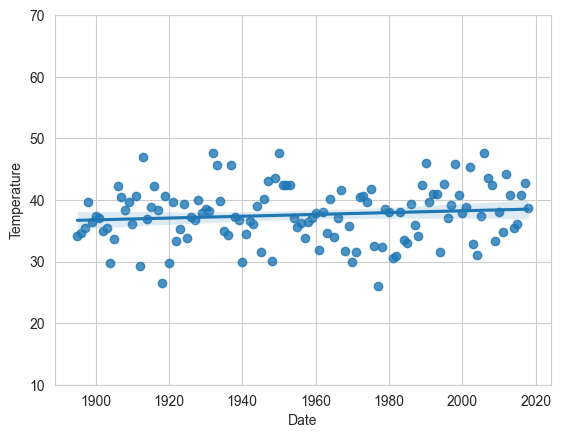

In [91]:
sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date,y=nyc.Temperature)

axes.set_ylim(10, 70)

# 15.4 Case Study: Time Series and Simple Linear Regression

# Loading Average High Tempuratures into a DF

In [92]:
import pandas as pd

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

nyc.columns = ['Date', 'Temperature', 'Anomaly ']

nyc.Date = nyc.Date.floordiv(100)

In [93]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


# Splitting the Data for Training and Testing

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

In [95]:
X_train.shape

(93, 1)

In [96]:
X_test.shape

(31, 1)

# Training the Model

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [99]:
linear_regression.coef_

array([0.01939167])

In [100]:
linear_regression.intercept_

-0.30779820252656265

# Testing the Model

In [101]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')
    

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


# Predicting Future Temps and Estimating Past Temps

In [102]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [103]:
predict(2019)

array([38.84399018])

In [104]:
predict(1890)

array([36.34246432])

In [105]:
predict(2026)

array([38.97973189])

# Visualizing teh Dataset with Regression Line

(10.0, 70.0)

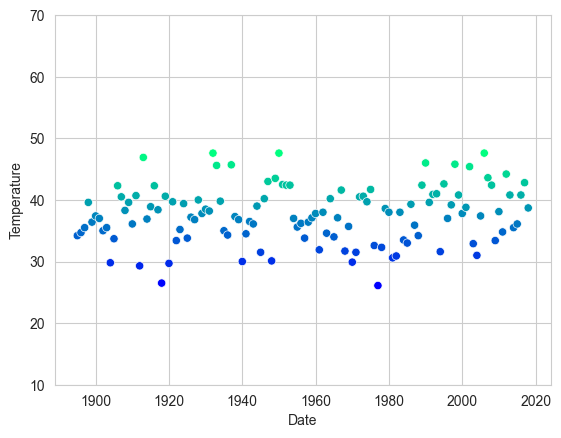

In [106]:
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

In [107]:
import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [108]:
y = predict(x)

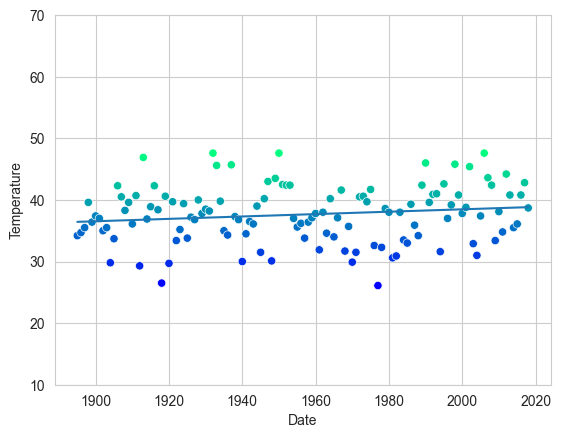

In [109]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
line = plt.plot(x,y)